In [185]:
import os

%matplotlib inline
import string
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt

# data
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer

# Feature selection
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer

# classifiers / models
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

# other
from sklearn.metrics import accuracy_score, log_loss, make_scorer, mean_squared_error
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, log_loss, make_scorer, mean_squared_error, confusion_matrix


#New import statements to add
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (plot_confusion_matrix)

## Summary of the data set
The data set used in this project is the results of a chemical analysis of the Portuguese "Vinho Verde" wine, conducted by [Paulo Cortez, University of Minho, Guimarães,
Portugal](http://www3.dsi.uminho.pt/pcortez) A. Cerdeira, F. Almeida, T.
Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009. It was sourced from the [UCI Machine
Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).

There are two datasets for red and white wine samples. For each wine sample observation , the inputs contains measurements of various objective physicochemical tests, and the output is the median wine quality ratings given by experts on the scale from 0 (very bad) and 10 (very excellent).The author notes that data on grape types, wine brand, wind selling price among other are not available due to privacy and logistics issues. There are 1599 observations for red wine and 4898 observations of white wine.

# Data Import

In [71]:
red_wine = pd.read_csv('data/raw/winequality-red.csv')
white_wine = pd.read_csv('data/raw/winequality-white.csv')

After importing the downloaded data,  the below tables show the summary statistics of all numeric features in the white wine data set. 

In [72]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Similar table for red wine data set

In [73]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Base on the brief summary of the data above, there is no missing value, all the features have numeric values, hence there is no major preprocessing needed. We decide to combine the two data sets of red wine and white wine to consider wine type (i.e. red or wine) as another possible features that could link to wine quality. Below is the combined data set.

In [74]:
white_wine['type'] = 'white'
red_wine['type'] = 'red'
wine_df = pd.concat([white_wine, red_wine], axis = 0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [75]:
bins = (1, 4, 6, 9)
rating_groups = ['poor','normal','excellent']
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = rating_groups)

In [76]:
train_df, test_df = train_test_split(wine_df,test_size = 0.2 , random_state = 123)

#train_df['type'] = train_df['type'].astype('category')
#test_df['type'] = test_df['type'].astype('category')
X_train = train_df.drop(columns = ['quality'], axis=1)
y_train = train_df['quality']

X_test = test_df.drop(columns = ['quality'], axis=1)
y_test = test_df['quality']


In [77]:
y_train.value_counts()

normal       3967
excellent    1028
poor          202
Name: quality, dtype: int64

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 1554 to 3582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5197 non-null   float64 
 1   volatile acidity      5197 non-null   float64 
 2   citric acid           5197 non-null   float64 
 3   residual sugar        5197 non-null   float64 
 4   chlorides             5197 non-null   float64 
 5   free sulfur dioxide   5197 non-null   float64 
 6   total sulfur dioxide  5197 non-null   float64 
 7   density               5197 non-null   float64 
 8   pH                    5197 non-null   float64 
 9   sulphates             5197 non-null   float64 
 10  alcohol               5197 non-null   float64 
 11  quality               5197 non-null   category
 12  type                  5197 non-null   object  
dtypes: category(1), float64(11), object(1)
memory usage: 533.0+ KB


# PreProcessor

In [207]:
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                   'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
binary_features = ['type']

numeric_transformer = make_pipeline(SimpleImputer(), StandardScaler())
binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary", dtype=int))

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features)
    ]
)

In [211]:
#DataStructure to store results
results={}
# helper function from lectures 573, UBC MDS
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, 
                            X_train, y_train, n_jobs=-1, 
                            **kwargs)    
    
    mean_scores = pd.DataFrame(scores).mean()
    #std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):  
        out_col.append(mean_scores[i])

    return pd.Series(data = out_col, index = mean_scores.index)

<h>
    
# Model Selection
    
<h>

### Stacking Classifier

In [212]:
#Stacking Classifier
scoring_metric = {'f1_micro'}
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(bootstrap=False, max_depth=20,
                                        max_features='sqrt', n_estimators=1800,
                                        random_state=123))
pipe_catboost = make_pipeline(preprocessor, CatBoostClassifier(verbose=0, random_state=123))
pipe_svc = make_pipeline(preprocessor, SVC(probability=True))
classifiers = {
    "svm": pipe_svc,
    'random forest' : pipe_rf,
    'CatBoost' : pipe_catboost,
}

In [213]:
#Testing stacking model
stacking_model = StackingClassifier(list(classifiers.items()), 
                 final_estimator=RandomForestClassifier())

results['StackingClf'] = mean_std_cross_val_scores(stacking_model, X_train, y_train, return_train_score=True, scoring=scoring_metric)

#### ALL other classifiers

In [214]:
#Model selection plot 

classifiers_plot = {
    "RidgeClassifier": RidgeClassifier(random_state=123),
    "Random Forest":RandomForestClassifier(bootstrap=False, max_depth=20,
                                         max_features='sqrt', n_estimators=1800,
                                         random_state=123),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP Classifier":MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50),
                               learning_rate='adaptive', max_iter=1000,random_state=123),
    "Nearest Centroid": NearestCentroid(),
    "QDA" :QuadraticDiscriminantAnalysis()
}
for (name, model) in classifiers_plot.items():
    pipe_iter = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(pipe_iter, X_train, y_train, return_train_score=True, scoring=scoring_metric)
pd.DataFrame(results)

,StackingClf,RidgeClassifier,Random Forest,KNN,MLP Classifier,Nearest Centroid,QDA
fit_time,172.520758,0.031203,18.603735,0.025178,14.387223,0.014531,0.020165
score_time,0.725142,0.009627,0.530930,0.111333,0.012545,0.012488,0.011142
test_f1_micro,0.834328,0.779105,0.843177,0.797769,0.807961,0.502023,0.715223
train_f1_micro,0.998990,0.782327,1.000000,0.853185,0.987349,0.504040,0.723205


# Plotting results
### All classifiers

In [220]:
#alt.Chart(results).encode
plot_results = pd.DataFrame(results).T
plot_results =plot_results.reset_index()
bar = alt.Chart(plot_results).mark_bar().encode(
    alt.X('test_f1_micro', axis=alt.Axis(title='F1 Micro score')),
    alt.Y('index', sort='-x', axis=alt.Axis(title='Classifier')),
).properties(
    width=alt.Step(40)  # controls width of bar.
)
bar

alt.Chart(...)

## Plotting stability across cv folds

In [256]:
scores_rf = cross_validate(pipe_rf, X_train, y_train, 
                         return_train_score=True,scoring = scoring_metric, n_jobs=-1, cv=20 )

In [265]:
plot_rf = pd.DataFrame(scores_rf)
bar = alt.Chart(plot_rf).mark_bar().encode(
   x= alt.X('test_f1_micro', axis=alt.Axis(title='F1 Micro score'), bin=alt.Bin(maxbins=6)),
   y= alt.Y('count()'),
)
bar

alt.Chart(...)

In [267]:
#pipe_mlp = make_pipeline(preprocessor, model)
scores_sml = cross_validate(stacking_model, X_train, y_train, 
                         return_train_score=True,scoring = scoring_metric, n_jobs=-1, cv=20 )

In [270]:
plot_sml = pd.DataFrame(scores_sml)
alt.Chart(plot_sml).mark_bar().encode(
   x= alt.X('test_f1_micro', axis=alt.Axis(title='F1 Micro score'), bin=alt.Bin(maxbins=6)),
   y= alt.Y('count()'),
)

alt.Chart(...)

#### Here, we can observe that Random forests are more consistent across CV folds

# HyperParameter Optimization

In [160]:
param_dist = {
     'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,300,500,450,200,250, 600, 700],
     'randomforestclassifier__bootstrap': [True, False],
     'randomforestclassifier__max_features': ['auto', 'sqrt'],
     'randomforestclassifier__min_samples_leaf': [1, 2, 4],
     'randomforestclassifier__min_samples_split': [2, 5, 10],
     'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [ ]:
random_search = RandomizedSearchCV(pipe_rf, param_distributions=param_dist, n_jobs=-1, n_iter=20, cv=10, scoring = scoring_metric)
random_search.fit(X_train, y_train)

In [271]:
print("Best cv score from grid search: %.3f" % random_search.best_score_)
random_search.best_params_

Best cv score from grid search: 0.829


{'randomforestclassifier__n_estimators': 1800,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__bootstrap': False}

## Interpreting Our model

In [273]:
best_model_pipe = random_search.best_estimator_
best_model_pipe.fit(X_train, y_train)
best_model_pipe.score(X_test, y_test)

0.8523076923076923

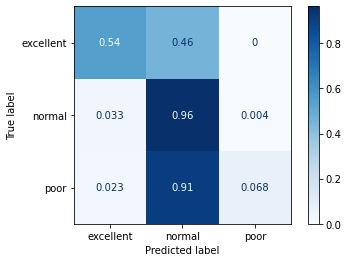

In [275]:
from sklearn.metrics import (plot_confusion_matrix)
plot_confusion_matrix(best_model_pipe, X_test, y_test, cmap = plt.cm.Blues, normalize='true')
predictions_m = best_model_pipe.predict(X_test)
cm = confusion_matrix(y_test, predictions_m)